In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [29]:
cancer = load_breast_cancer()

In [30]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [31]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [32]:
features = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [33]:
target = pd.DataFrame(cancer.target, columns = ["TARGET"])

In [34]:
data = pd.concat([features, target], axis = 1)

In [35]:
correl = data.corr('pearson')

In [36]:
abs(correl['TARGET']).sort_values()

symmetry error             0.006522
texture error              0.008303
mean fractal dimension     0.012838
smoothness error           0.067016
fractal dimension error    0.077972
concavity error            0.253730
compactness error          0.292999
worst fractal dimension    0.323872
mean symmetry              0.330499
mean smoothness            0.358560
concave points error       0.408042
mean texture               0.415185
worst symmetry             0.416294
worst smoothness           0.421465
worst texture              0.456903
area error                 0.548236
perimeter error            0.556141
radius error               0.567134
worst compactness          0.590998
mean compactness           0.596534
worst concavity            0.659610
mean concavity             0.696360
mean area                  0.708984
mean radius                0.730029
worst area                 0.733825
mean perimeter             0.742636
worst radius               0.776454
mean concave points        0

In [37]:
X1 = data['worst concave points']

In [38]:
X2 = data['worst perimeter']

In [39]:
Y = data['TARGET']

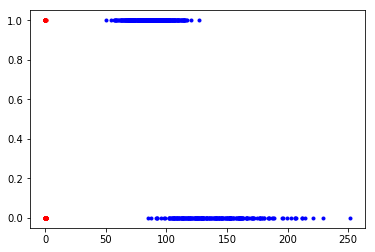

In [40]:
plt.plot(X1, Y, 'r.',
        X2, Y, 'b.')

In [41]:
X1 = (X1 - X1.min())/(X1.max() - X1.min())

In [42]:
X2 = (X2 - X2.min())/(X2.max() - X2.min())

In [43]:
Y = (Y - Y.min())/(Y.max() - Y.min())

In [44]:
x1 = np.array(X1)

In [45]:
x2 = np.array(X2)

In [46]:
y = np.array(Y)

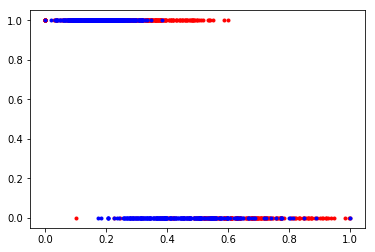

In [47]:
plt.plot(x1, y, 'r.',
        x2, y, 'b.')

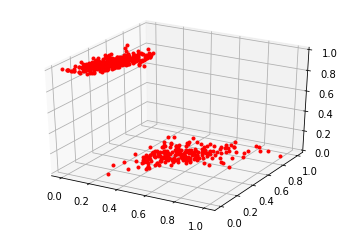

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(x2, x1, y, 'r.')

In [49]:
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x1, x2, y, test_size = 0.25)

In [50]:
def hyp(a, x1, b, x2, c):
    return (1/(1 + np.exp(-(a*x1 + b*x2 + c)))) 

In [51]:
def error(a, x1, b, x2, c, y):
    e = 0
    m = len(x1)
    
    for i in range(m):
        e += -(y[i]*np.log(hyp(a, x1[i], b, x2[i], c))) - ((1 - y[i])*np.log(1 - hyp(a, x1[i], b, x2[i], c)))
        
    return (1/m)*e

In [52]:
def step_grad(a, x1, b, x2, c, y, learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x1)
    
    for i in range(m):
        grad_a += (hyp(a, x1[i], b, x2[i], c) - y[i])*x1[i]
        grad_b += (hyp(a, x1[i], b, x2[i], c) - y[i])*x2[i]
        grad_c += (hyp(a, x1[i], b, x2[i], c) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c

In [53]:
def descnd(init_a, x1, init_b, x2, init_c, y, learning_rate, iteration):
    a = init_a
    b = init_b
    c = init_c
    for i in range(iteration):
        e = error(a, x1, b, x2, c, y)
        
        if i % 1000 == 0:
            print(f"error : {e}, a = {a}, b = {b}, c = {c}")
            
        a, b, c = step_grad(a, x1, b, x2, c, y, learning_rate)
    
    return a, b, c

In [54]:
a = -10.616469554790992
b = -26.446302889880545
c = 12.720167835927661
learning_rate = 0.001
iteration = 20000

final_a, final_b, final_c = descnd(a, x1_train, b, x2_train, c, y_train, learning_rate, iteration)

error : 0.13687160309146892, a = -10.616469554790992, b = -26.446302889880545, c = 12.720167835927661
error : 0.1365739562736027, a = -10.522973960000996, b = -26.57112529558029, c = 12.609020084811938
error : 0.1365248577080419, a = -10.415209892086843, b = -26.66516649954479, c = 12.588571252892473
error : 0.13648755493038778, a = -10.326122124418628, b = -26.753088498538293, c = 12.57459401649811
error : 0.13645868768483652, a = -10.252574931343586, b = -26.83550417370746, c = 12.565883546585018
error : 0.1364358976103793, a = -10.19192243643202, b = -26.912938015377208, c = 12.56142513324099
error : 0.13641753250820066, a = -10.141944778450142, b = -26.985841452061045, c = 12.560370540053048
error : 0.13640243425665058, a = -10.100788166570993, b = -27.054605298249953, c = 12.562015236078327
error : 0.13638978859498183, a = -10.066910340711178, b = -27.119569877807734, c = 12.565777329964753
error : 0.1363790197703848, a = -10.039032102030951, b = -27.18103327690298, c = 12.5711786

In [55]:
error(final_a, x1_train, final_b, x2_train, final_c, y_train)

0.13631788525886462

In [56]:
error(final_a, x1_test, final_b, x2_test, final_c, y_test)

0.11944107685302717

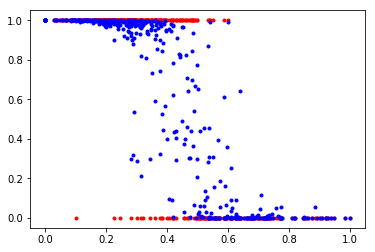

In [57]:
plt.plot(x1_train, y_train, 'r.',
        x1_train, hyp(final_a, x1_train, final_b, x2_train, final_c), 'b.')

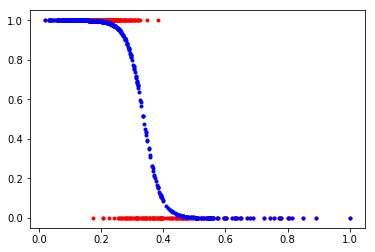

In [58]:
plt.plot(x2_train, y_train, 'r.',
        x2_train, hyp(final_a, x2_train, final_b, x2_train, final_c), 'b.')

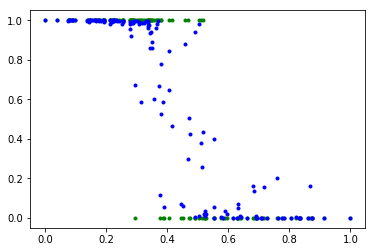

In [59]:
plt.plot(x1_test, y_test, 'g.',
         x1_test, hyp(final_a, x1_test, final_b, x2_test, final_c), 'b.')

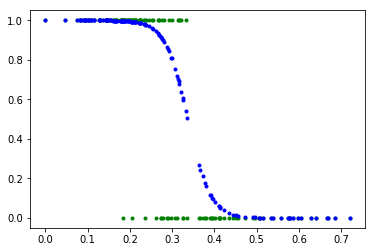

In [60]:
plt.plot(x2_test, y_test, 'g.',
         x2_test, hyp(final_a, x2_test, final_b, x2_test, final_c), 'b.')

In [61]:
def accuracy(a, x1, b, x2, c, y):
    correct = 0
    m = len(x1)
    
    for i in range(m):
        pred = hyp(a, x1[i], b, x2[i], c)
        
        if pred >= 0.5:
            z = 1
            
        else:
            z = 0
        
        if y[i] == z:
            correct += 1
    print(f"Accuray : {100*correct/len(y)}")

In [62]:
accuracy(final_a, x1_train, final_b, x2_train, final_c, y_train)

Accuray : 93.89671361502347


In [63]:
accuracy(final_a, x1_test, final_b, x2_test, final_c, y_test)

Accuray : 93.7062937062937
